<a href="https://colab.research.google.com/github/yonas8989/wheat_crop_production_ml/blob/main/whieght_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Latitude  Longitude  apparentTemperatureMax  apparentTemperatureMin  \
0  31.659157  72.341565               44.072192               29.264916   
1  24.552223  83.651481               33.811489               29.188423   
2  25.053288  72.861068               22.020405               12.163084   
3  36.091315  72.719879               41.994364               28.916630   
4  18.960587  79.651551               35.074907               12.321231   

   cloudCover   dewPoint  humidity  precipIntensity  precipIntensityMax  \
0    0.356576  17.301551  0.765369         0.199313            1.552217   
1    0.406334  16.531581  0.782977         4.887975            1.749305   
2    0.813958  18.337718  0.640384         4.381282            2.608996   
3    0.751695  17.915672  0.357538         0.520668            1.723544   
4    0.675791  12.468106  0.494761         1.714945            3.272974   

   precipProbability  ...  precipTypeIsOther     pressure  temperatureMax  \
0           0.668593 

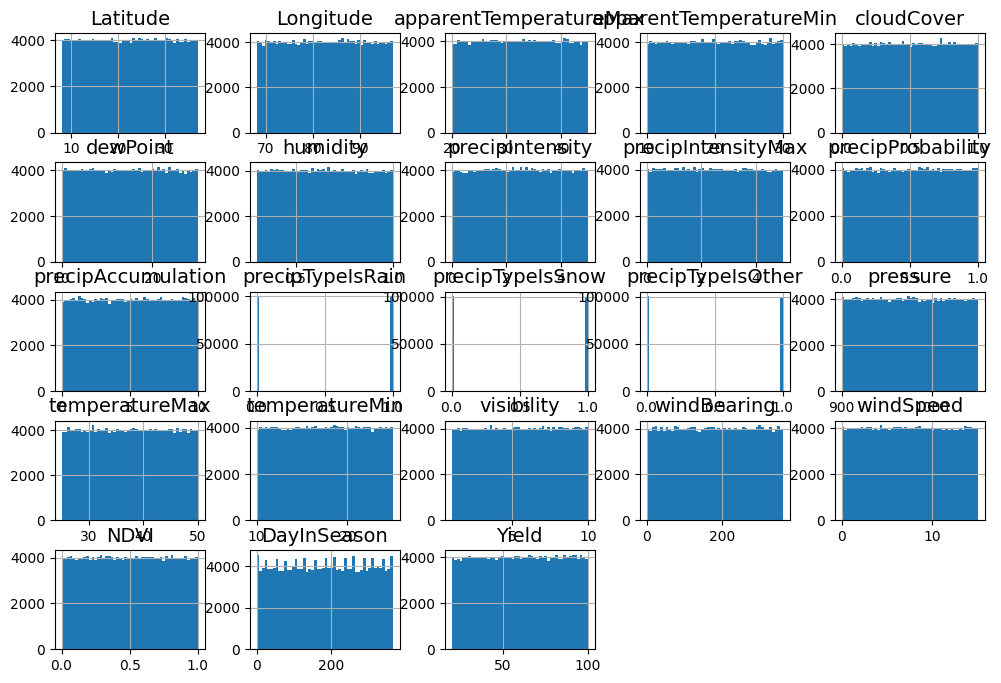

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4000/4000 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 699.8447 - mae: 21.9291 - val_loss: 544.3876 - val_mae: 20.1601
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 542.1111 - mae: 20.1294 - val_loss: 547.2988 - val_mae: 20.2004
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 541.3243 - mae: 20.1213 - val_loss: 534.6473 - val_mae: 20.0235
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 538.5846 - mae: 20.0523 - val_loss: 533.3475 - val_mae: 20.0107
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 539.1356 - mae: 20.0823 - val_loss: 535.0528 - val_mae: 20.0389
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - loss: 536.9893 - mae: 20.0532 - val_loss: 533.3710 - val_mae: 20.0141
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 538.2437 - mae: 20.0756 - val_loss: 533.5685 - val_mae: 20.0180
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 538.6446 - mae: 20.0823 - val_loss: 538.4120 - val_mae: 20.

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
agriculture_data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shaikasif89/wheat-yeild/versions/1",
    "mock_india_data_200k.csv",
)

# Display dataset info
print(agriculture_data.head())
print(agriculture_data.describe())

# Data visualization
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

agriculture_data.hist(bins=50, figsize=(12, 8))
plt.show()

# Train-test split
train_set, test_set = train_test_split(agriculture_data, test_size=0.2, random_state=42)

# Preparing features and labels
train_labels = train_set["Yield"].copy()
train_features = train_set.drop(columns=["Yield"]).values

# Standardizing data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

test_labels = test_set["Yield"].copy()
test_features = scaler.transform(test_set.drop(columns=["Yield"]).values)

# Reshape input for CNN (assuming tabular data is reshaped to fit CNN needs)
train_features = train_features.reshape(-1, train_features.shape[1], 1)
test_features = test_features.reshape(-1, test_features.shape[1], 1)

# Define CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_features.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output layer
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(train_features, train_labels, epochs=50, validation_split=0.2, batch_size=32)




In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate model on test set
test_predictions = model.predict(test_features).flatten()

# Compute RMSE correctly
test_mse = mean_squared_error(test_labels, test_predictions)
test_rmse = np.sqrt(test_mse)  # Manually take square root for RMSE

# Print test RMSE
print("Test RMSE:", test_rmse)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test RMSE: 23.052852105681048


In [ ]:
# Function to predict yield from user input
def predict_yield(input_data):
    input_array = np.array(input_data).reshape(1, -1)  # Reshape for model
    input_scaled = scaler.transform(input_array)  # Scale input
    input_scaled = input_scaled.reshape(1, input_scaled.shape[1], 1)  # Reshape for CNN
    prediction = model.predict(input_scaled).flatten()[0]  # Predict yield
    return prediction

# Ensure sample input has 22 values (replace with actual values from dataset)
sample_input = [30.5, 75.2, 12.4, 50.3, 1.2, 0.8, 0.9, 1.1, 20.5, 60.2, 2.3, 1.8, 3.0, 0.6, 8.4, 0.5, 12.9, 0.3, 22.1, 10.8, 0.7, 1.5]

predicted_yield = predict_yield(sample_input)
print("Predicted Yield:", predicted_yield)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted Yield: 275.5004
